In [9]:
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import numpy as np
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
import matplotlib.cm as cm
from scipy import constants
import pandas as pd
from matplotlib import rc
import matplotlib
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams.update({'font.size': 22})
plt.ioff()
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 9 and height to 9
fig_size[1] = 9
fig_size[0] = 9
markersize = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


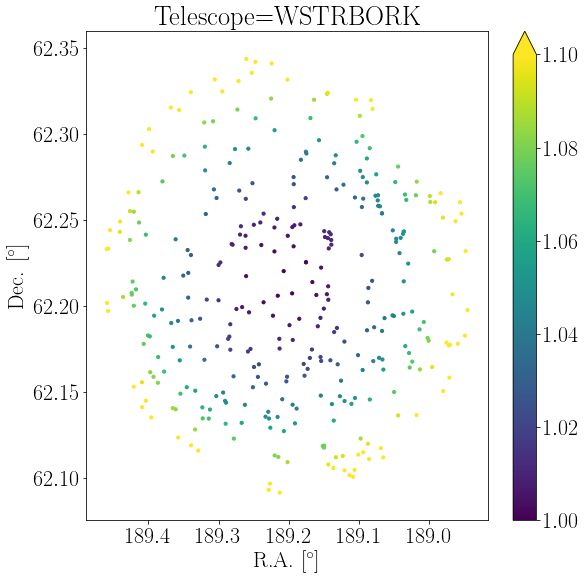

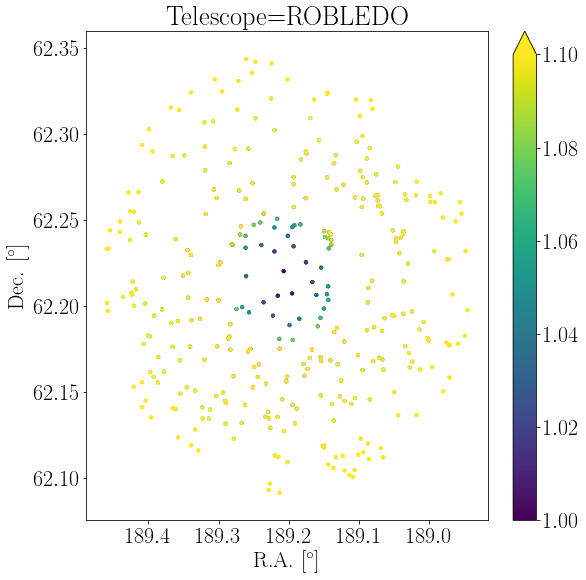

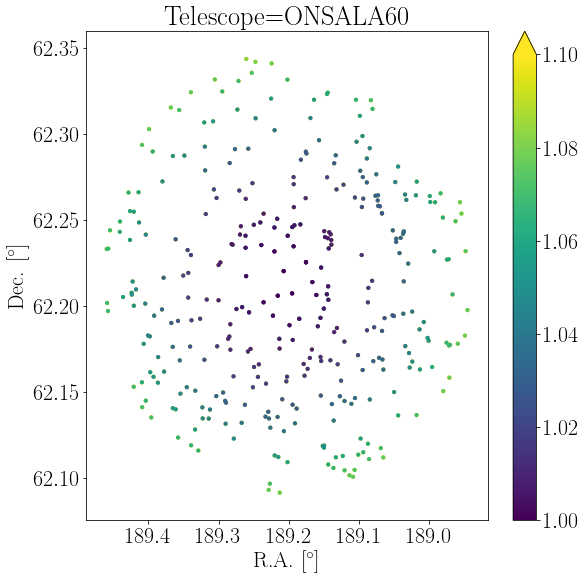

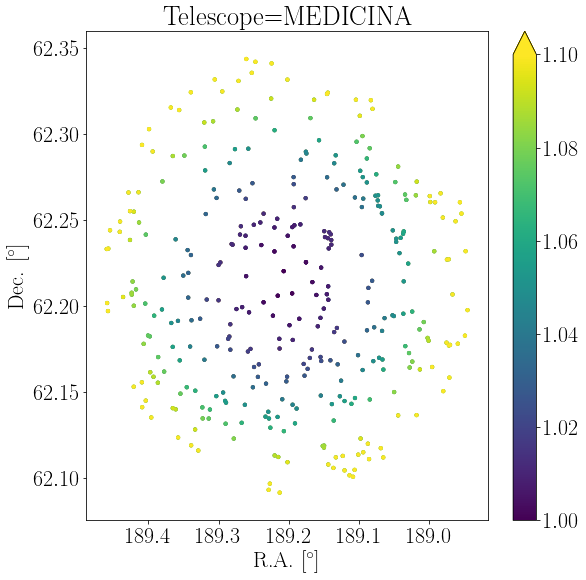

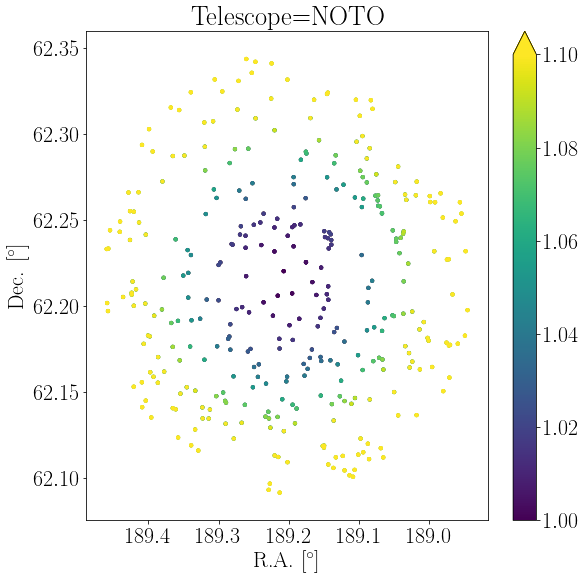

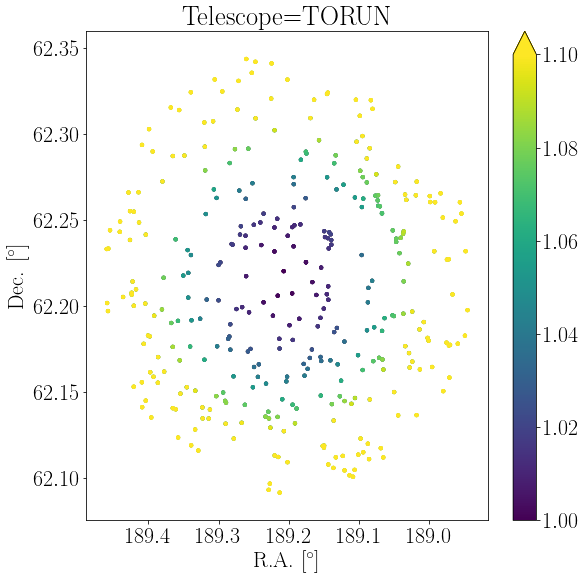

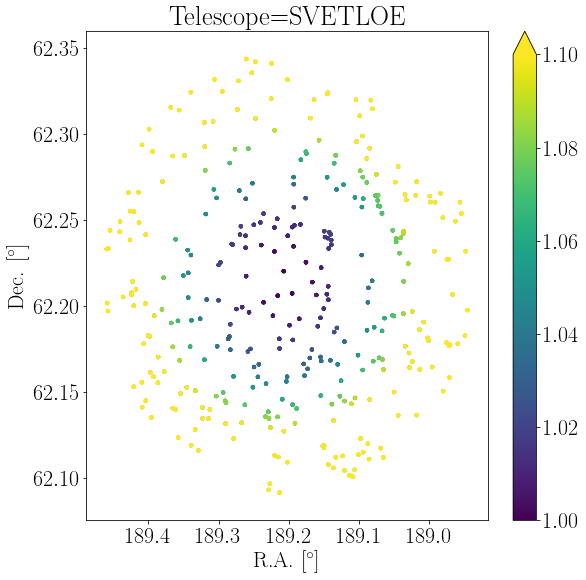

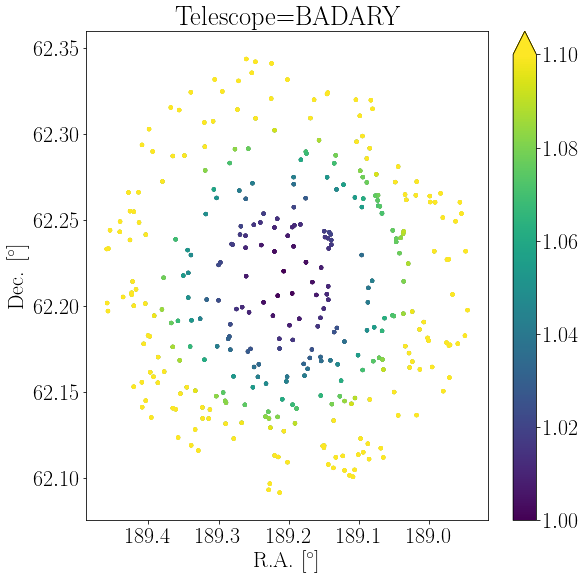

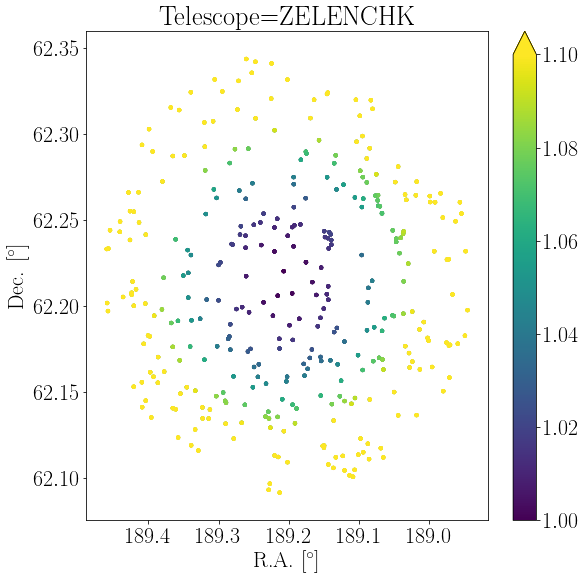

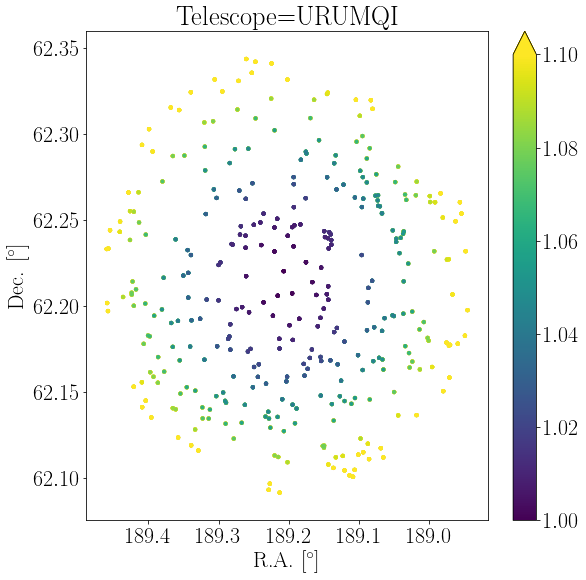

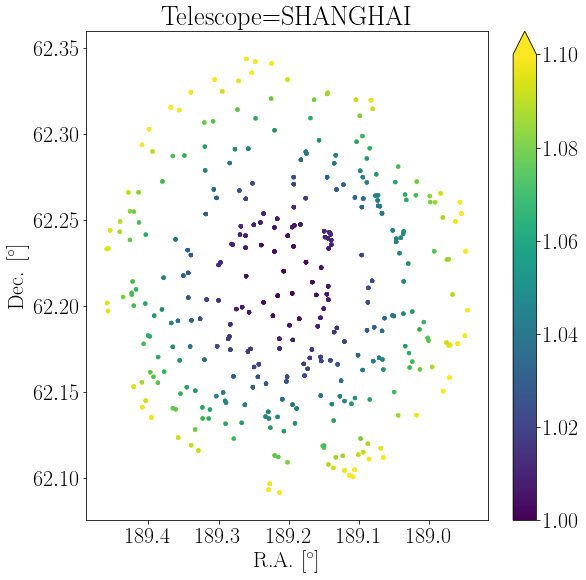

In [10]:
x_central = np.load(open('central_pointing_params.pckl','rb+'))
## Inputs
telescope_index = np.linspace(0,len(x_central[0][3])-1,len(x_central[0][3]))
telescope_name = ['WSTRBORK','ROBLEDO','ONSALA60','MEDICINA','NOTO','TORUN',\
              'SVETLOE','BADARY','ZELENCHK','URUMQI','SHANGHAI']
RA = []
Dec = []
telescope_corr = []
for k in telescope_index:
    k = int(k)
    for i in range(len(x_central)):
        if x_central[i][0].startswith('HDFC'):
            if float(x_central[i][1]) > 360:
                    RA = RA + [float(x_central[i][1]) -360]
            else:
                    RA = RA + [float(x_central[i][1])]
            Dec = Dec + [float(x_central[i][2])]
            telescope_corr = telescope_corr + x_central[i][3][int(k)].values()
            if x_central[i][0].startswith('HDFC0153'):
                    HDFC0153central_corr = x_central[i][3]
    fig, ax = plt.subplots()
    plt.gca().invert_xaxis()
    scat = ax.scatter(RA, Dec, c=telescope_corr, s=10,vmin=1,vmax=1.1)
    plt.title(r'Telescope=%s' % (telescope_name[k]))
    plt.colorbar(scat,extend='max')
    plt.xlabel(r'R.A. [$^\circ$]')
    plt.ylabel(r'Dec. [$^\circ$]')
    plt.savefig(r'Telescope_%s' % (telescope_name[k]), bbox_inches='tight')
    plt.show()


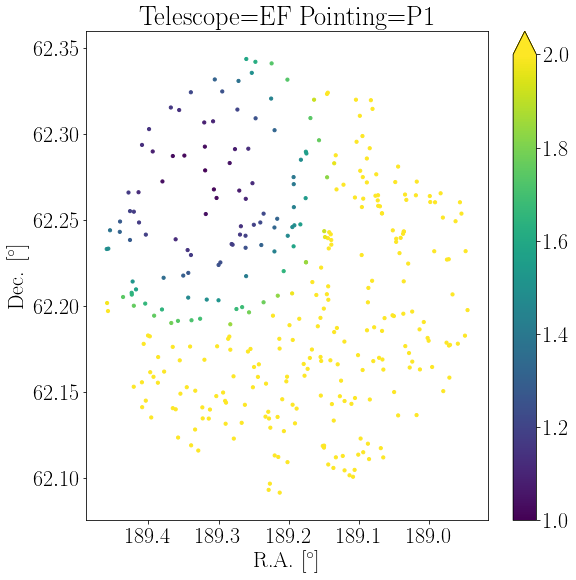

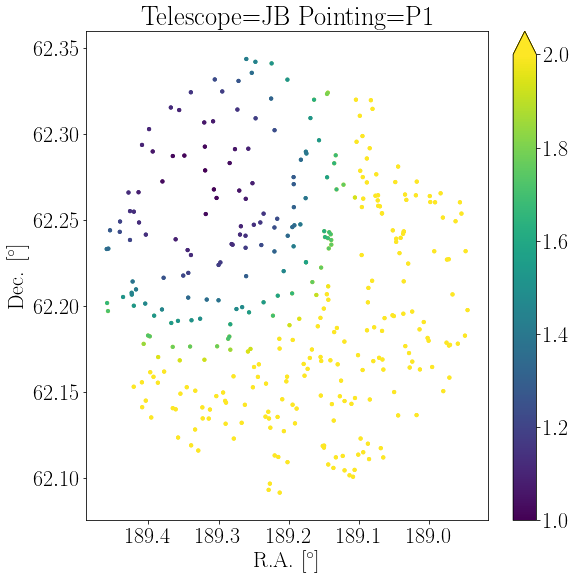

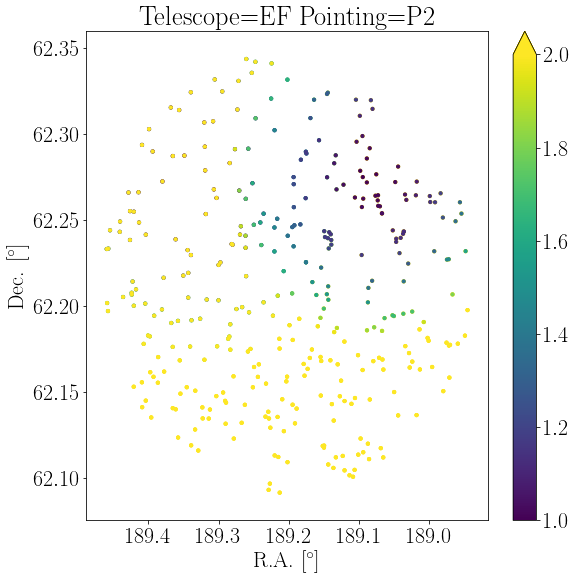

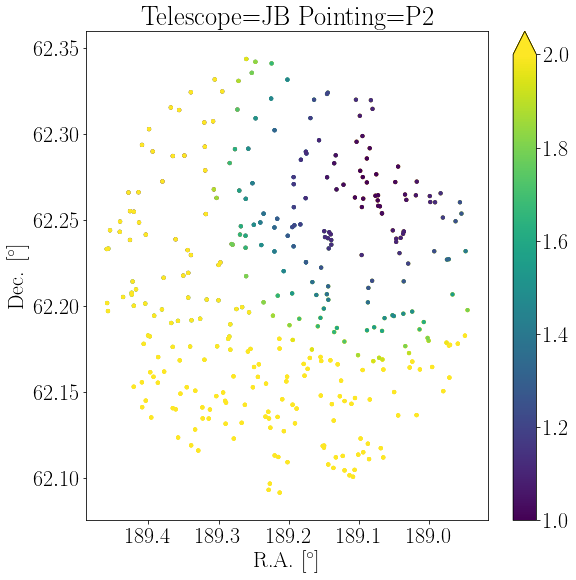

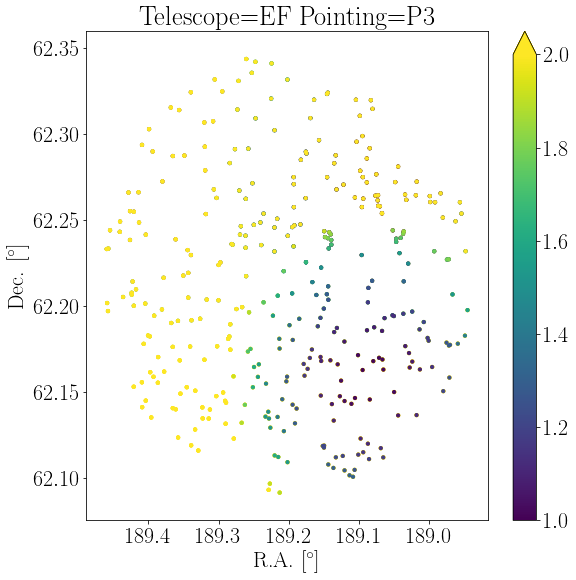

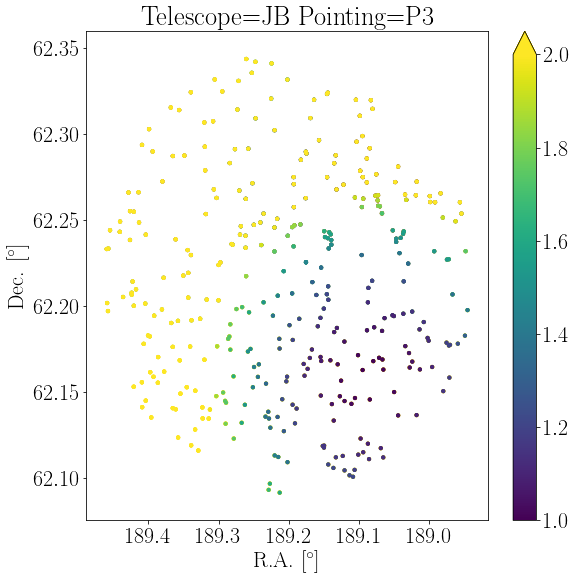

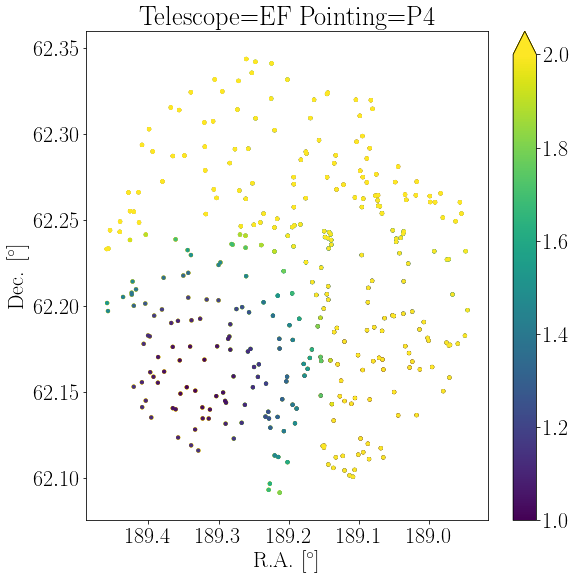

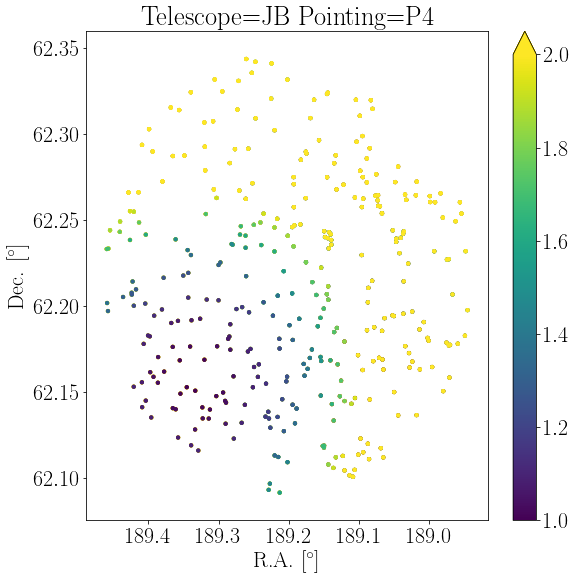

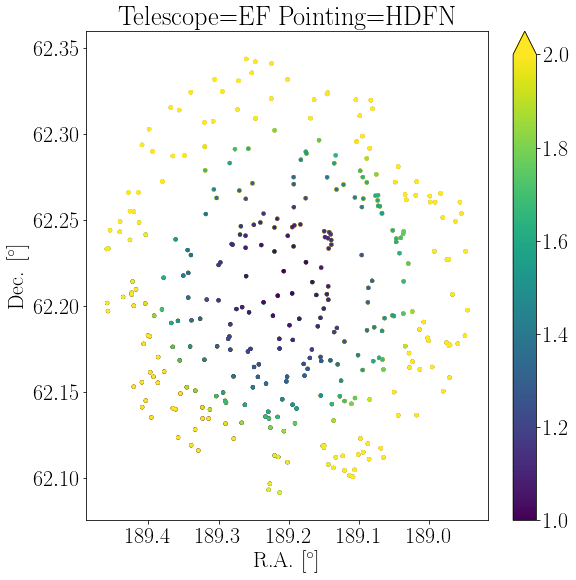

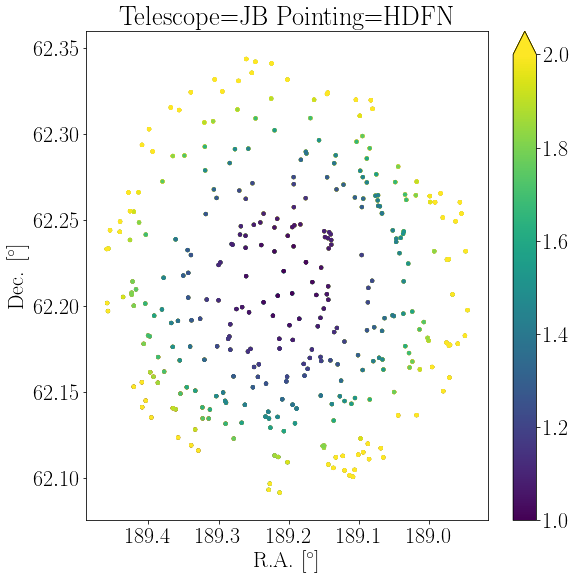

In [11]:
x_outside = np.load(open('outside_pointing_params.pckl','rb+'))
#print x['P1']
## Inputs
Pointing = ['P1','P2','P3','P4','HDFN']
telescope_index = [0,1]
telescope_name = ['EF','JB']


RA = []
Dec = []
telescope_corr = []
HDFC0153outside_corr = []
for j in Pointing:
    x = x_outside[j]
    for k in telescope_index:
        for i in range(len(x)):
            if x[i][0].startswith('HDFC'):
                if float(x[i][1]) > 360:
                    RA = RA + [float(x[i][1]) -360]
                else:
                    RA = RA + [float(x[i][1])]
                
                Dec = Dec + [float(x[i][2])]
                telescope_corr = telescope_corr + x[i][3][k].values()
                if x[i][0].startswith('HDFC0153'):
                    HDFC0153outside_corr = HDFC0153outside_corr + [x[i][3]]
        fig, ax = plt.subplots()
        plt.gca().invert_xaxis()
        scat = ax.scatter(RA, Dec, c=telescope_corr, s=10,vmin=1, vmax=2)
        plt.title(r'Telescope=%s Pointing=%s' % (telescope_name[k],j))
        plt.colorbar(scat,extend='max')
        plt.xlabel(r'R.A. [$^\circ$]')
        plt.ylabel(r'Dec. [$^\circ$]')
        plt.savefig(r'Telescope_%s_Pointing_%s' % (telescope_name[k],j), bbox_inches='tight')
        plt.show()


1.54865847103


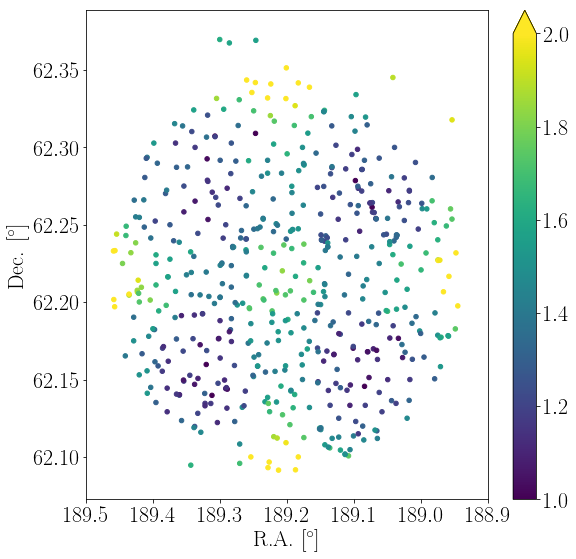

In [12]:
nopbcor = np.load('rms_nopbcor.npy').T
pbcor = np.load('rms_pbcor.npy').T


RA = []
Dec = []
nopbcor_rms = []
pbcor_rms = []
for i in range(len(nopbcor)):
    x = np.where(pbcor==nopbcor[i][0][:8]+'_PBCOR_NA_IM.fits')[0]
    if x:
        if nopbcor[i][0][:8] == 'HDFC0153':
            HDFC0153RA = float(nopbcor[i][1])
            HDFC0153Dec = float(nopbcor[i][2])
            print float(pbcor[x[0]][3])/float(nopbcor[i][3])
        RA = RA + [float(nopbcor[i][1])]
        Dec = Dec + [float(nopbcor[i][2])]
        nopbcor_rms = nopbcor_rms + [float(nopbcor[i][3])]
        pbcor_rms = pbcor_rms + [float(pbcor[x[0]][3])]
    
fig, ax = plt.subplots()
scat = ax.scatter(RA, Dec, c=np.array(pbcor_rms)/np.array(nopbcor_rms), s=20,vmin=1,vmax=2)
#HDFC0153_pos = ax.scatter(HDFC0153RA, HDFC0153Dec, s=100)
plt.xlim(188.9,189.5)
plt.gca().invert_xaxis()
plt.colorbar(scat,extend='max')
plt.xlabel(r'R.A. [$^\circ$]')
plt.ylabel(r'Dec. [$^\circ$]')
plt.savefig(r'RMS_diff', bbox_inches='tight')
plt.show()

In [13]:
print HDFC0153central_corr
print HDFC0153outside_corr

[{2: 1.0681605948671373}, {3: 1.6769131554506842}, {4: 1.0431034783627577}, {5: 1.075404375498872}, {6: 1.1140844887743613}, {7: 1.1140844887743613}, {8: 1.1140844887743613}, {9: 1.1140844887743613}, {10: 1.1140844887743613}, {11: 1.0681605948671373}, {12: 1.0606525912633809}]
[[{1: 1.740757108704005}, {13: 1.5053085292180224}], [{1: 1.740757108704005}, {13: 1.5053085292180224}], [{1: 1.2460384126741435}, {13: 1.1762147453588807}], [{1: 1.2460384126741435}, {13: 1.1762147453588807}], [{1: 6.8807059653881684}, {13: 4.149889922309427}], [{1: 6.8807059653881684}, {13: 4.149889922309427}], [{1: 9.6375456224348248}, {13: 5.3211659269166525}], [{1: 9.6375456224348248}, {13: 5.3211659269166525}], [{1: 2.0292358287384289}, {13: 1.6856262671785045}], [{1: 2.0292358287384289}, {13: 1.6856262671785045}]]


In [14]:
from astropy.io import fits
from astropy.coordinates import  Angle, SkyCoord
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata
import scipy.ndimage as ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp2d
from scipy.ndimage.filters import gaussian_filter
from regions import CircleSkyRegion
from astropy.wcs import WCS

In [21]:
RA_all = np.load('rms_pbcor_all.npy')[1]
Dec_all = np.load('rms_pbcor_all.npy')[2]
rms_all = np.load('rms_pbcor_all.npy')[3].astype(float)

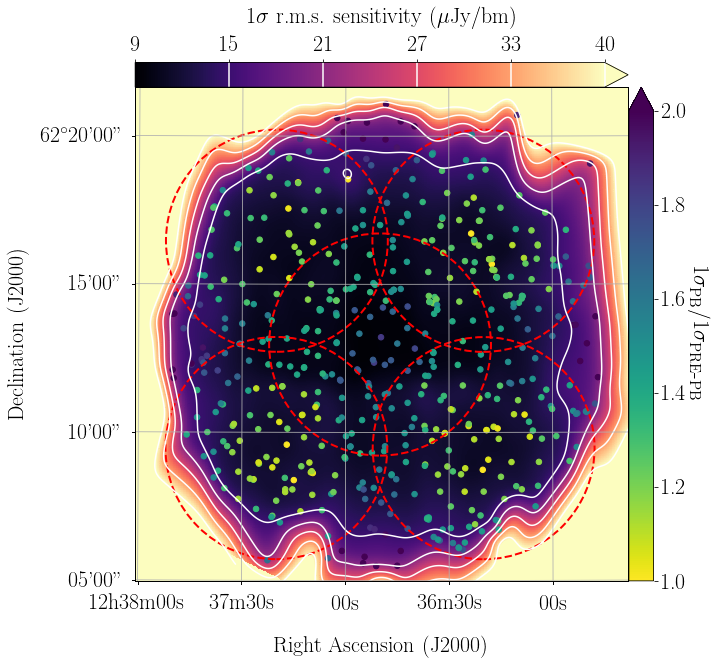

In [26]:
c = SkyCoord(RA_all, Dec_all, unit='deg', frame='icrs')

central_pb = SkyCoord(RA, Dec, unit='deg', frame='icrs')
rms_central = np.array(pbcor_rms)


### Create axes & scatter plot
def grid(x, y, z, resX=1000, resY=1000):
    "Convert 3 column data to matplotlib grid"
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    Z2 = ndimage.gaussian_filter(Z, sigma=1.0, order=1)
    #Z = interp2d(x, y, z, kind='cubic')
    #Z2 = Z(xi,yi)
    X, Y = meshgrid(xi, yi)
    return X, Y, Z


outfilename = 'HDFC0155_NA_PBCOR_IMPy.fits'
hdu = fits.open(outfilename)
wcs = WCS(hdu[0].header)
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
#ax1 = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
lon = ax.coords['ra']
lat = ax.coords['dec']
lon.set_major_formatter('hh:mm:ss')
lat.set_major_formatter('dd:mm:ss')
lon.set_axislabel('Right Ascension (J2000)', minpad=1.5)
lat.set_axislabel('Declination (J2000)', minpad=1)
lim = 500000
shiftx = -50000
shifty = -10000
ax.set_xlim((lim * -1) + shiftx, lim + shiftx)
ax.set_ylim((lim * -1) + shifty, lim + shifty)
#ax1.set_xlim(-500000, 500000)HDFC0155_PBCOR_IM.fits
#ax1.set_ylim(-500000, 500000)
X, Y, Z = grid(c.ra.degree, c.dec.degree, rms_all)
Z_gauss = np.nan_to_num(np.array(gaussian_filter(Z, 12)))
Z_gauss[Z_gauss == 0] = 50
im = ax.pcolormesh(
    X,
    Y,
    Z_gauss,
    transform=ax.get_transform('icrs'),
    cmap='magma',
    vmin=np.amin(rms_all),
    vmax=40,
    alpha=1)
CS = ax.contour(
    X,
    Y,
    gaussian_filter(Z, 10),
    levels=np.linspace(np.amin(rms_all), 40, 6),
    colors='w',
    transform=ax.get_transform('icrs'),
    interpolation='none')
divider = make_axes_locatable(ax)
cax = divider.append_axes(
    "top", size="5%", pad=0.00, axes_class=matplotlib.axes.Axes)
cb = plt.colorbar(
    orientation="horizontal",
    mappable=im,
    cax=cax,
    format='%d',
    ticks=np.linspace(np.amin(rms_all), 40, 6),
    extend='max')
cb.add_lines(CS)
cb.ax.xaxis.set_ticks_position('top')
cax.set_xlabel("1$\sigma$ r.m.s. sensitivity ($\mu$Jy/bm)", labelpad=-80)


##### Scatter portion ####
scat = ax.scatter(
    central_pb.ra.degree,
    central_pb.dec.degree,
    transform=ax.get_transform('icrs'),
    marker='o',
    c=np.array(pbcor_rms) / np.array(nopbcor_rms),s=30,vmin=1,vmax=2,
    alpha=1,cmap='viridis_r')
cax2 = divider.append_axes(
    "right", size="5%", pad=0.01, axes_class=matplotlib.axes.Axes)
cb2 = plt.colorbar(
    orientation="vertical",
    mappable=scat,
    cax=cax2,
    format='%.1f',
    extend='max')
cax2.set_ylabel(r"$1\sigma_{\rm PB}/1\sigma_{\rm PRE\mbox{-}PB}$",rotation=270, labelpad=22)

### Regions of EF primary beams
region1 = CircleSkyRegion(
    SkyCoord('12h36m50.0s', '+62d12m58.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region1 = region1.to_pixel(wcs)
region2 = CircleSkyRegion(
    SkyCoord('12h37m20.0s', '+62d16m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region2 = region2.to_pixel(wcs)
region3 = CircleSkyRegion(
    SkyCoord('12h36m20.0s', '+62d16m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region3 = region3.to_pixel(wcs)
region4 = CircleSkyRegion(
    SkyCoord('12h36m20.0s', '+62d09m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region4 = region4.to_pixel(wcs)
region5 = CircleSkyRegion(
    SkyCoord('12h37m20.0s', '+62d09m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region5 = region5.to_pixel(wcs)
linewidths = 2
pixel_region1.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region2.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region3.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region4.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region5.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
#print np.amin(rms), np.amax(rms)
fig.savefig('rms_pbcor_plot.png', bbox_inches='tight', dpi=fig.dpi, format="png")

In [28]:
np.save('rms_differences_natural_weighting.npy',[central_pb.ra.degree,central_pb.dec.degree,np.array(pbcor_rms) / np.array(nopbcor_rms)])